# Data driven simulation of a Portfolio Allocation Model


### Aim of the project:
Optimal Portfolio management is a major problem for people nowadays, with a
constant need for lucrative methods of investment. This project aims to simulate the ideal
portfolio allocation of stocks in various sectors of the industry. This is facilitated with the help of
statistical analysis using python modules. The end result is a calculated weight based portfolio
distribution and an expected overall return.

### Theory :

A portfolio is a range of investments held by a person or
organization.  The monetary value of each asset may influence the risk/reward ratio of the portfolio. 
When determining asset allocation, the aim is to maximise the expected return and minimise the risk.

To determine the optimum portfolio, we utilize the **Sharpe Ratio**.

#### Sharpe Ratio- 
Sharpe ratio is the measure of risk-adjusted return of a financial portfolio. 
It is a measure of excess portfolio return over the risk-free rate relative to its standard deviation, that is, it is the ratio of return to that of the volatility/risk. A portfolio with a higher Sharpe ratio is considered superior relative to its peers. Thus the optimum portfolio is the one with the highest sharpe ratio.

### Method :
This project makes use of previous stock data of companies and comprises details of prices
per year from 2010 from yahoo finance. After collecting the data, the mean value, the covariance of the stocks are calculated. The next step is
the random assignment of weights. Expected returns, expected volatility and sharpe ratio is calculated for each portfolio. The portfolio with the highest sharpe ratio is identified. Finally the optimum allocaction of the assets is displayed, with the 
overall return and the portfolio volatility.

### Formulae used :

1. Portfolio weight $W_{i}$ = $\frac{Stock's  Value}{Total  Portfolio  Value}$
<br /> 
<br />
2. Log returns of an asset, r$_{i}$ = log$\frac{FV}{PV}$, where FV = Future Value, PV = Previous Value \
<br /> 
<br />
3. Expected return of portfolio, E[R] = $\sum\limits _{i} ^{}W_{i}\mu_{i}$, where $W_{i}$ is weight of i$^{th}$ asset/stock, $\mu_{i}$ is expected return for i$^{th}$ security
<br /> 
<br /> 
4. Covariance $\sigma_{ij} = \sum\limits _{} ^{}(r_{i}-\mu_{j})(r_{j}-\mu_{i})$
<br /> 
<br /> 
This gives rise to the covariance matrix $\underline{\sum}= \begin{bmatrix}
  \sigma_{1}^{2} & \sigma_{12} & \cdots & \sigma_{1n} \\
  \sigma_{21} & \sigma_{2}^{2} & \cdots & \sigma_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_{n}^{2} 
 \end{bmatrix}$
<br /> 
<br /> 
5. Expected volatility of portfolio $\sigma = \sqrt{W^{T}\underline{\sum} W}$
<br /> 
<br /> 
6. Sharpe ratio = $\frac{E[R]}{\sigma}$

##### Sample stock tickers:

1. Rain Industries Ltd. (RAIN.NS)
2. Sterlite Technologies Ltd. (STRTECH.NS)
3. Graftech International Ltd. (EAF)
4. PSP Projects Ltd. (PSPPROJECT.BO)
5. IDFC First Bank limited (IDFCFIRSTB.NS)
6. Mahindra & Mahindra Limited (M&M.NS)
7. Stitch Fix Inc,. (SFIX)
8. Maruti Suzuki India Ltd. (MARUTI.NS)
9. Reliance Industries Ltd. (RELIANCE.NS)
10. Tata Consultancy Services Ltd. (TCS.NS)
11. JSW Steel Ltd. (JSWSTEEL.NS)
12. Indian Railway Catering and Tourism Company Ltd. (IRCTC.NS)

To find tickers of other stocks refer to this website- https://in.finance.yahoo.com/

#### Install necessary packages-

pip3 install numpy \
pip3 install pandas\
pip3 install pandas-datareader\
pip3 install matplotlib

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
pd.core.common.is_list_like=pd.api.types.is_list_like
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

/home/suraj/.local/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Input assets

num_assets=int(input("enter no. of stocks:- \n "))
assets=[input("enter stock ticker:- ") for _ in range(num_assets)]

enter no. of stocks:- 
 3
enter stock ticker:- TCS.NS
enter stock ticker:- JSWSTEEL.NS
enter stock ticker:- MARUTI.NS


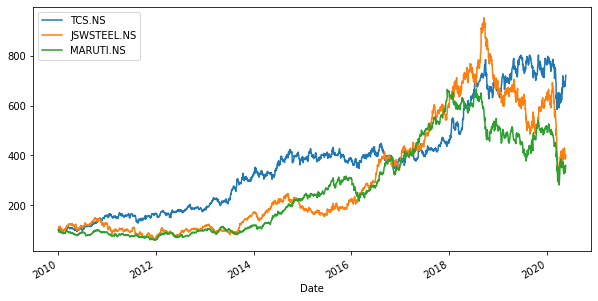

In [3]:
# Retrieving data from yahoo finance

pf_data = pd.DataFrame()
for a in assets:
    try:
        pf_data[a]=wb.DataReader(a,data_source='yahoo',start='2010-1-1')['Adj Close']
    
    except Exception:
        print(f'No data found for {a}. Please obtain correct ticker name')
        
# Displaying normalized return

(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))


Maximum Sharpe Ratio: 0.81
Expected returns of optimum portfolio: 17.33 %
Expected returns of optimum portfolio: 21.35 %

The optimum allocation of assets are- 

Weight of TCS.NS       is 70.15  % 
Weight of JSWSTEEL.NS  is 4.84   % 
Weight of MARUTI.NS    is 25.01  % 


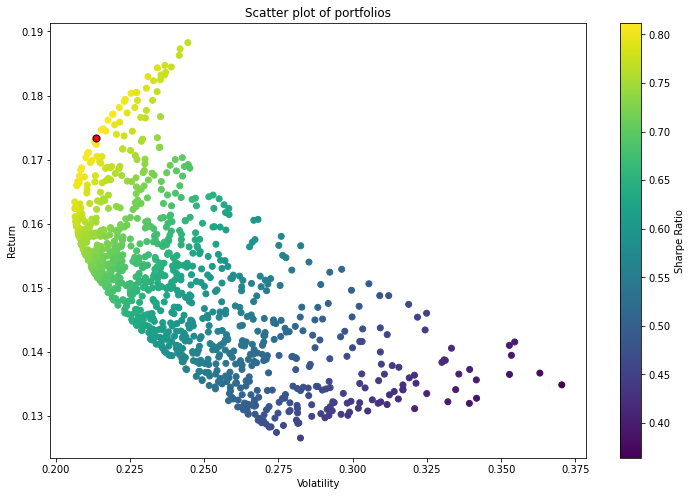

In [13]:
# Calculating logarithmic rates of return

log_returns=np.log(pf_data / pf_data.shift(1))

# Declaring arrays for returns, volatilities and sharpe ratios

num_ports=1000  # number of portfolios being generated
pfolio_returns = np.empty((num_ports,1))
pfolio_volatilities = np.empty((num_ports,1))
all_weights = np.zeros((num_ports, num_assets))
sharpe_array= np.zeros(num_ports)

# Generating random weights

all_weights = np.random.random(size=(num_ports, num_assets))      
all_weights = [weights/np.sum(weights) for weights in all_weights]

# Calculating expected returns, expected volatilities and sharpe ratios for different weights

for i,weights in enumerate(all_weights):
    pfolio_returns[i]      = (np.sum(weights * log_returns.mean()) * 250) # 250 represents number of working days in a year
    pfolio_volatilities[i] = (np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    sharpe_array[i]        =  pfolio_returns[i]/pfolio_volatilities[i]
    
print(f'\nMaximum Sharpe Ratio: {sharpe_array.max():.2f}') # Displaying max sharpe ratio

# Expected returns and volatility of optimum portfolio

k=sharpe_array.argmax()
max_sr_returns = pfolio_returns[k]
max_sr_volatilities = pfolio_volatilities[k]

print(f'Expected returns of optimum portfolio: {max_sr_returns[0]*100:.2f} %')
print(f'Expected returns of optimum portfolio: {max_sr_volatilities[0]*100:.2f} %')

# Displaying allocation of assets in optimum portfolio

all_weights= np.array(all_weights)
new_weights=all_weights[k,:]*100
print("\nThe optimum allocation of assets are- \n")
for i in range(num_assets):
    print(f"Weight of {assets[i]:<12} is {new_weights[i]:<6.2f} % ")

# Displaying returns and volatilities of all portfolios using scatter plot

plt.figure(figsize=(12,8))
plt.scatter(pfolio_volatilities,pfolio_returns, c=sharpe_array, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_volatilities, max_sr_returns,c='red', s=50, edgecolors='black') 
plt.title('Scatter plot of portfolios')
plt.show()

# Determining optimum portfolio using scipy

SciPy is a Python library used for scientific computing and technical computing. We will use it for optimisation purposes and observe whether the result matches the values we obtained in the previous method

In [6]:
# calculates returns, volatlities and sharpe ratios of portfolio
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_returns.mean() * weights) * 250
    vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

# minimize negative Sharpe Ratio(to obtain maximum Sharpe Ratio)
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

# check allocation sums to 1
def check_sum(weights):
    return np.sum(weights)-1

# create constraint variable
cons=({'type':'eq','fun':check_sum})

# create weight boundaries
bounds=[(0,1) for _ in range(num_assets)]

# initial guess (having equal weights)
initial_guess=[1/num_assets for _ in range(num_assets)]

In [7]:
# Determining portfolio with maximum sharpe ratio
from scipy.optimize import minimize
opt_results = minimize(neg_sharpe, initial_guess,method='SLSQP',bounds=bounds,constraints=cons)
fresult=get_ret_vol_sr(opt_results.x)

print(f"The expected return is {fresult[0]*100:.2f} %\n")
print(f"The expected volitility is {fresult[1]*100:.2f} %\n")
print(f"The max sharpe ratio is {fresult[2]:.2f} \n ")

returns =np.sum(initial_guess*log_returns.mean())*250
print(f"The return if all the stocks have equal Weightage is {returns*100:.2f}  % \n ")

volatility=np.sqrt(np.dot(initial_guess,np.dot(log_returns.cov() * 250, initial_guess)))
print(f"The Volatility if all the stocks have equal Weightage is {volatility*100:.2f} % \n ")

The expected return is 17.27 %

The expected volitility is 21.27 %

The max sharpe ratio is 0.81 
 
The return if all the STOCKS have equal Weightage is 15.06  % 
 
The Volatility if all the STOCKS have equal Weightage is 22.83 % 
 
